In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [142]:
df = pd.read_csv('Cessoes_de_Direitos.csv', sep=',', encoding="ISO-8859-1", on_bad_lines="skip")
df

,Superintendência,Processo,Tipo de requerimento,Fase Atual,CPF CNPJ do titular,Titular,Municipio(s),Substância(s),Tipo(s) de Uso,Situação,Data da Cessão
0,Gerência Regional / BA,870761/2001,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,08.631.561/0001-09,Limerick Mineração do Brasil Ltda,JEQUIÉ - BA,GRANITO,Industrial,Sim,31/12/2008
1,Gerência Regional / BA,872014/2017,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,14.790.648/0001-13,"FELIX BRUNO MINERACAO, COMERCIO, INDUSTRIA, MA...",MACAÚBAS - BA,QUARTZITO,Revestimento,Sim,16/05/2022
2,Gerência Regional / SC,802789/1974,Requerimento de Autorização de Pesquisa,Concessão de Lavra,03.222.166/0001-40,COMERCIAL DACLANDE LTDA,"IBIRAMA - SC, LONTRAS - SC","ARGILA, ARGILA, GRANITO, SIENO GRANITO","Brita, Demais substâncias, Demais substâncias,...",Sim,09/11/2016
3,Gerência Regional / MG,832270/2012,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,10.732.593/0001-34,D.R. EXTRACAO E COMERCIO DE AREIA LTDA,LEOPOLDINA - MG,"AREIA, MINÉRIO DE OURO","Construção civil, Industrial",Sim,17/12/2015
4,Gerência Regional / PB,846226/2002,Requerimento de Autorização de Pesquisa,Concessão de Lavra,04.257.245/0001-50,VITORIA MINING - MINERACAO IMPORTACAO E EXPORT...,SANTA LUZIA - PB,GRANITO ORNAMENTAL,Construção civil,Sim,31/07/2015
...,...,...,...,...,...,...,...,...,...,...,...
52147,Gerência Regional / TO,864229/2017,Requerimento de Disponibilidade para pesquisa,Autorização de Pesquisa,40.045.224/0001-34,LINDELMAN JOSE GASPAR DE SOUSA EIRELI,CONCEIÇÃO DO TOCANTINS - TO,MINÉRIO DE OURO,Demais substâncias,Sim,10/05/2021
52148,Gerência Regional / BA,870085/2021,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,***.491.036-**,Thaisa de Andrade Benedito,ANDARAÍ - BA,DIAMANTE,Industrial,Sim,26/10/2023
52149,Gerência Regional / RS,810583/2024,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,NaN,NaN,PAULO BENTO - RS,"BASALTO, SAIBRO","Brita, Construção civil",Sim,17/06/2025
52150,Gerência Regional / PE,840170/2024,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,NaN,NaN,PAUDALHO - PE,ARGILA,Cerâmica vermelha,Sim,04/08/2025


In [143]:
df.columns

Index(['Superintendência', 'Processo', 'Tipo de requerimento', 'Fase Atual',
       'CPF CNPJ do titular', 'Titular', 'Municipio(s)', 'Substância(s)',
       'Tipo(s) de Uso', 'Situação', 'Data da Cessão'],
      dtype='object')

In [144]:
df.shape

(52152, 11)

### Selecionando atributos relevantes

In [145]:
df_filtrado = df.drop(columns=['Superintendência', 'Processo', 'CPF CNPJ do titular', 'Titular', 'Municipio(s)', 'Situação', 'Data da Cessão'])
df_filtrado

,Tipo de requerimento,Fase Atual,Substância(s),Tipo(s) de Uso
0,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,GRANITO,Industrial
1,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,QUARTZITO,Revestimento
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,"ARGILA, ARGILA, GRANITO, SIENO GRANITO","Brita, Demais substâncias, Demais substâncias,..."
3,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,"AREIA, MINÉRIO DE OURO","Construção civil, Industrial"
4,Requerimento de Autorização de Pesquisa,Concessão de Lavra,GRANITO ORNAMENTAL,Construção civil
...,...,...,...,...
52147,Requerimento de Disponibilidade para pesquisa,Autorização de Pesquisa,MINÉRIO DE OURO,Demais substâncias
52148,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,DIAMANTE,Industrial
52149,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,"BASALTO, SAIBRO","Brita, Construção civil"
52150,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,ARGILA,Cerâmica vermelha


### Pré-processamento

Verificando valores ausentes

In [146]:
df_filtrado.isnull().sum()

Tipo de requerimento    0
Fase Atual              0
Substância(s)           7
Tipo(s) de Uso          7
dtype: int64

In [147]:
# removendo instâncias com valores vazios
df_filtrado = df_filtrado.dropna(subset=['Substância(s)', 'Tipo(s) de Uso'])

In [148]:
df_filtrado.isnull().sum()

Tipo de requerimento    0
Fase Atual              0
Substância(s)           0
Tipo(s) de Uso          0
dtype: int64

In [149]:
df_filtrado.shape

(52145, 4)

Obs: não há outliers, pois não há mais valores numéricos no df

### Binning

In [150]:
# verificando quantidades de valores diferentes
pd.set_option("display.max_rows", None)
df_filtrado['Fase Atual'].value_counts()

Fase Atual
Autorização de Pesquisa        18518
Requerimento de Lavra          15458
Concessão de Lavra             15158
Direito de Requerer a Lavra     1805
Lavra Garimpeira                1206
Name: count, dtype: int64

In [151]:
df_filtrado['Tipo de requerimento'].value_counts()

Tipo de requerimento
Requerimento de Autorização de Pesquisa                                  43954
Requerimento de Disponibilidade para pesquisa                             2037
Requerimento de Cessão parcial                                            2020
Requerimento de Lavra Garimpeira                                          1173
Requerimento de Pesquisa - Leilão                                          897
Requerimento de Mudança de Regime para Aut. de Pesquisa                    594
Requerimento de Pesquisa - Oferta Pública                                  311
Requerimento de Manifesto de Mina                                          280
Requerimento de Registro de Licença                                        265
Requerimento de Grupamento Mineiro                                         225
Requerimento de Disponibilidade para lavra                                 178
Requerimento de Mudança de Regime para PLG                                  77
Requerimento de Disponibilidade

In [152]:
df_filtrado['Substância(s)'].value_counts()

Substância(s)
GRANITO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        5265
AREIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3829
MINÉRIO DE OURO   

In [153]:
# Divide os valores da coluna "Direitos" pelo separador ","
df_filtrado["Substância(s)"] = df_filtrado["Substância(s)"].astype(str).str.split(",")

# Explode para criar várias linhas
df_filtrado = df_filtrado.explode("Substância(s)")

# Remove espaços extras
df_filtrado["Substância(s)"] = df_filtrado["Substância(s)"].str.strip()

df_filtrado.shape

C:\Users\roger\AppData\Local\Temp\ipykernel_24112\1119164850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Substância(s)"] = df_filtrado["Substância(s)"].astype(str).str.split(",")


(81029, 4)

In [154]:
df_filtrado['Substância(s)'].value_counts()

Substância(s)
AREIA                           12291
GRANITO                          8292
ARGILA                           7600
MINÉRIO DE OURO                  5990
CALCÁRIO                         4702
MINÉRIO DE FERRO                 2517
QUARTZITO                        2358
CASCALHO                         2159
QUARTZO                          1824
ÁGUA MINERAL                     1791
DIAMANTE                         1633
OURO                             1329
SAIBRO                           1309
MINÉRIO DE MANGANÊS              1215
ARGILA REFRATÁRIA                1176
TURFA                            1160
MÁRMORE                          1131
FOSFATO                          1124
MINÉRIO DE COBRE                 1107
GNAISSE                          1103
CAULIM                           1081
BAUXITA                          1038
BASALTO                           911
FELDSPATO                         726
FERRO                             583
MINÉRIO DE NÍQUEL                 53

In [155]:
# binning de minérios
minerios_agrupados = {
    "Rochas de Construção": [
        "GRANITO", "MÁRMORE", "BASALTO", "GNAISSE", "ARENITO", "QUARTZITO",
        "CALCÁRIO", "DOLOMITO", "SIENITO", "DIABÁSIO", "FILITO", "ARDÓSIA",
        "PEGmatito", "GRANODIORITO"
    ],
    "Materiais de Areia e Argila": [
        "AREIA", "AREIA QUARTZOSA", "AREIA DE FUNDIÇÃO", "AREIA P/ VIDRO",
        "AREIA INDUSTRIAL", "ARGILA", "ARGILA REFRATÁRIA", "ARGILA COMUM",
        "CAULIM", "BENTONITA"
    ],
    "Minérios Metálicos": [
        "MINÉRIO DE FERRO", "FERRO", "MINÉRIO DE MANGANÊS", "MANGANÊS",
        "MINÉRIO DE COBRE", "COBRE", "MINÉRIO DE NÍQUEL", "NÍQUEL",
        "MINÉRIO DE ZINCO", "ZINCO", "MINÉRIO DE CHUMBO", "CHUMBO",
        "MINÉRIO DE ESTANHO", "ESTANHO", "MINÉRIO DE TITÂNIO", "TITÂNIO",
        "MINÉRIO DE CROMO", "CROMO", "MINÉRIO DE LÍTIO", "LÍTIO",
        "MINÉRIO DE ALUMÍNIO", "ALUMÍNIO", "BAUXITA"
    ],
    "Minérios Nobres e Preciosos": [
        "OURO", "MINÉRIO DE OURO", "PRATA", "MINÉRIO DE PRATA", "PLATINA",
        "MINÉRIO DE PLATINA", "DIAMANTE", "DIAMANTE INDUSTRIAL"
    ],
    "Gemas e Minerais Ornamentais": [
        "ESMERALDA", "AMETISTA", "TOPÁZIO", "TURMALINA", "QUARTZO RÓSEO",
        "ÁGATA", "GRANADA", "CITRINO", "OPALA"
    ],
    "Minerais Industriais": [
        "FELDSPATO", "FLUORITA", "GRAFITA", "TALCO", "MICA", "MOSCOVITA",
        "BARITA", "GIPSITA", "APATITA"
    ],
    "Combustíveis e Energéticos": [
        "CARVÃO", "CARVÃO MINERAL", "TURFA", "ANTRACITO"
    ],
    "Águas Minerais": [
        "ÁGUA MINERAL", "ÁGUA POTÁVEL DE MESA", "ÁGUAS TERMAIS"
    ]
}

mapa_substancia = {
    substancia: categoria
    for categoria, substancias in minerios_agrupados.items()
    for substancia in substancias
}

df["Categoria"] = df["Substância(s)"].map(mapa_substancia).fillna("Outros")

df['Categoria'].value_counts()

Categoria
Outros                          22293
Rochas de Construção            10982
Materiais de Areia e Argila      6726
Minérios Metálicos               5043
Minérios Nobres e Preciosos      4430
Águas Minerais                   1568
Minerais Industriais              664
Combustíveis e Energéticos        374
Gemas e Minerais Ornamentais       72
Name: count, dtype: int64

In [156]:
pd.reset_option("display.max_rows")

df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

,Tipo de requerimento,Fase Atual,Substância(s),Tipo(s) de Uso
0,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,GRANITO,Industrial
1,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,QUARTZITO,Revestimento
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,ARGILA,"Brita, Demais substâncias, Demais substâncias,..."
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,GRANITO,"Brita, Demais substâncias, Demais substâncias,..."
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,SIENO GRANITO,"Brita, Demais substâncias, Demais substâncias,..."
...,...,...,...,...
52063,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,MARGA,"Corretivo de solo, Demais substâncias, Industrial"
52075,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,CALCÁRIO,"Brita, Industrial"
52075,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,MINÉRIO DE ZINCO,"Brita, Industrial"
52080,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,TERRAS RARAS,"Industrial, Industrial, Industrial, Industrial..."


In [157]:
# para Tipo(s) de Uso
pd.set_option("display.max_rows", None)
df_filtrado['Tipo(s) de Uso'].value_counts()

Tipo(s) de Uso
Demais substâncias                                                                                                                                                                                                                                                                                                                                                     515
Industrial                                                                                                                                                                                                                                                                                                                                                             442
Industrial, Industrial                                                                                                                                                                                                                                             

In [158]:
# Divide os valores da coluna "Direitos" pelo separador ","
df_filtrado["Tipo(s) de Uso"] = df_filtrado["Tipo(s) de Uso"].astype(str).str.split(",")

# Explode para criar várias linhas
df_filtrado = df_filtrado.explode("Tipo(s) de Uso")

# Remove espaços extras
df_filtrado["Tipo(s) de Uso"] = df_filtrado["Tipo(s) de Uso"].str.strip()

df_filtrado["Tipo(s) de Uso"].value_counts()

Tipo(s) de Uso
Industrial               13192
Construção civil          4969
Demais substâncias        4751
Revestimento              3136
Brita                     1910
Gema                      1835
Cerâmica vermelha          875
Corretivo de solo          727
Ourivesaria                524
Fabricação de cimento      508
Pedra de coleção           505
Fertilizantes              485
Fabricação de cal          468
Energético                 339
Artesanato  mineral        323
Insumo agrícola            311
Engarrafamento             268
Pedra de talhe             204
Metalurgia                 166
Abrasivo                    69
Balneoterapia               53
Não informado               23
Pedra decorativa            18
Fabricação de ligas          6
Pigmento                     3
Fabricação de vidro          1
Name: count, dtype: int64

In [159]:
# binning para tipos de uso
usos_agrupados = {
    "Construção e Revestimento": [
        "Construção civil", "Revestimento", "Brita", "Cerâmica vermelha",
        "Fabricação de cimento", "Fabricação de cal", "Pedra de talhe", "Pedra decorativa"
    ],
    "Industrial Geral": [
        "Industrial", "Metalurgia", "Fabricação de ligas", "Pigmento",
        "Fabricação de vidro", "Abrasivo"
    ],
    "Agrícola": [
        "Corretivo de solo", "Fertilizantes", "Insumo agrícola"
    ],
    "Joalheria e Ornamental": [
        "Gema", "Ourivesaria", "Pedra de coleção", "Artesanato  mineral"
    ],
    "Energético": [
        "Energético"
    ],
    "Águas e Saúde": [
        "Engarrafamento", "Balneoterapia"
    ],
    "Outros": [
        "Demais substâncias", "Não informado"
    ]
}

# Inverter o dicionário: uso -> categoria
mapa_usos = {
    uso: categoria
    for categoria, usos in usos_agrupados.items()
    for uso in usos
}

# Criar coluna Categoria
pd.reset_option("display.max_rows")
df_filtrado["Uso"] = df_filtrado["Tipo(s) de Uso"].map(mapa_usos).fillna("Outros")
df_filtrado = df_filtrado.drop(columns=['Tipo(s) de Uso'])
df_filtrado

,Tipo de requerimento,Fase Atual,Substância(s),Uso
0,Requerimento de Autorização de Pesquisa,Requerimento de Lavra,GRANITO,Industrial Geral
1,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,QUARTZITO,Construção e Revestimento
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,ARGILA,Construção e Revestimento
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,ARGILA,Outros
2,Requerimento de Autorização de Pesquisa,Concessão de Lavra,ARGILA,Outros
...,...,...,...,...
52080,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,TERRAS RARAS,Industrial Geral
52080,Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,TERRAS RARAS,Industrial Geral
52103,Requerimento de Autorização de Pesquisa,Concessão de Lavra,CALCÁRIO,Construção e Revestimento
52103,Requerimento de Autorização de Pesquisa,Concessão de Lavra,CALCÁRIO,Águas e Saúde


In [160]:
df_filtrado['Tipo de requerimento'].value_counts()

Tipo de requerimento
Requerimento de Autorização de Pesquisa                                  25474
Requerimento de Disponibilidade para pesquisa                             3643
Requerimento de Cessão parcial                                            2089
Requerimento de Pesquisa - Leilão                                         1201
Requerimento de Lavra Garimpeira                                           970
Requerimento de Mudança de Regime para Aut. de Pesquisa                    440
Requerimento de Manifesto de Mina                                          362
Requerimento de Grupamento Mineiro                                         337
Requerimento de Pesquisa - Oferta Pública                                  318
Requerimento de Mudança de Regime para PLG                                 228
Requerimento de Disponibilidade para lavra                                 216
Requerimento de Disponibilidade para Pesquisa - Cumprimento Exigência      159
Requerimento de Registro de Lic

In [161]:
# binning para classe
requerimentos_agrupados = {
    "Pesquisa": [
        "Requerimento de Autorização de Pesquisa",
        "Requerimento de Pesquisa - Leilão",
        "Requerimento de Pesquisa - Oferta Pública",
        "Requerimento de Mudança de Regime para Aut. de Pesquisa",
        "Requerimento de Disponibilidade para Pesquisa - Cumprimento Exigência"
    ],
    "Lavra": [
        "Requerimento de Lavra Garimpeira",
        "Requerimento de Lavra - Leilão",
        "Requerimento de Lavra",
        "Requerimento de Lavra - Oferta Pública",
        "Requerimento de Disponibilidade para Lavra Garimpeira",
        "Requerimento de Disponibilidade para Lavra - Cumprimento Exigência"
    ],
    "Disponibilidade e Cessão": [
        "Requerimento de Disponibilidade para pesquisa",
        "Requerimento de Cessão parcial",
        "Requerimento de Disponibilidade para lavra"
    ],
    "Registro e Licença": [
        "Requerimento de Registro de Licença",
        "Requerimento de Desmembramento",
        "Requerimento de Manifesto de Mina",
        "Requerimento de Grupamento Mineiro",
        "Requerimento de Mudança de Regime para PLG",
        "Requerimento de Consórcio de Mineração"
    ]
}

# Inverter o dicionário: tipo de requerimento -> categoria
mapa_requerimento = {
    req: categoria
    for categoria, tipos in requerimentos_agrupados.items()
    for req in tipos
}

# Criar coluna Categoria
df_filtrado["Classe"] = df_filtrado["Tipo de requerimento"].map(mapa_requerimento).fillna("Outros")
df_filtrado = df_filtrado.drop(columns=['Tipo de requerimento'])
df_filtrado

,Fase Atual,Substância(s),Uso,Classe
0,Requerimento de Lavra,GRANITO,Industrial Geral,Pesquisa
1,Autorização de Pesquisa,QUARTZITO,Construção e Revestimento,Pesquisa
2,Concessão de Lavra,ARGILA,Construção e Revestimento,Pesquisa
2,Concessão de Lavra,ARGILA,Outros,Pesquisa
2,Concessão de Lavra,ARGILA,Outros,Pesquisa
...,...,...,...,...
52080,Autorização de Pesquisa,TERRAS RARAS,Industrial Geral,Pesquisa
52080,Autorização de Pesquisa,TERRAS RARAS,Industrial Geral,Pesquisa
52103,Concessão de Lavra,CALCÁRIO,Construção e Revestimento,Pesquisa
52103,Concessão de Lavra,CALCÁRIO,Águas e Saúde,Pesquisa


### Vetorização de categorias e classes

vetorização de categorias

In [163]:
# Inicializa o codificador OneHotEncoder para transformar variáveis categóricas em numéricas
ohe_encoder = OneHotEncoder(sparse_output=False)

# Define a lista de colunas categóricas a serem codificadas
categorical_columns = [
    'Fase Atual', 'Substância(s)', 'Uso'
]

# Remove a coluna alvo antes de trabalhar nos atributos
df_features = df_filtrado.drop(columns=['Classe'])

# Aplica a codificação One-Hot nas colunas categóricas do conjunto de treinamento
encoded_data = ohe_encoder.fit_transform(df_features[categorical_columns])

# Obtém os nomes das novas colunas geradas pela codificação
new_columns = ohe_encoder.get_feature_names_out(categorical_columns)

# Cria um DataFrame com os dados codificados e os novos nomes de colunas
df_ohe = pd.DataFrame(encoded_data, columns=new_columns)

# Remove as colunas categóricas originais do conjunto de treinamento
df_not_phe = df_features.drop(columns=categorical_columns).reset_index(drop=True)

# Concatena o DataFrame com as colunas codificadas ao DataFrame original
X = pd.concat([df_not_phe, df_ohe], axis=1)

X

,Fase Atual_Autorização de Pesquisa,Fase Atual_Concessão de Lavra,Fase Atual_Direito de Requerer a Lavra,Fase Atual_Lavra Garimpeira,Fase Atual_Requerimento de Lavra,Substância(s)_AGALMATOLITO,Substância(s)_ALEXANDRITA,Substância(s)_ALGAS CALCÁREAS,Substância(s)_ALUMÍNIO,Substância(s)_ALUVIÃO AURÍFERO,...,Substância(s)_ÁGUAS TERMAIS,Substância(s)_ÓSMIO,Substância(s)_ÓXIDOS DE MANGANÊS,Uso_Agrícola,Uso_Construção e Revestimento,Uso_Energético,Uso_Industrial Geral,Uso_Joalheria e Ornamental,Uso_Outros,Uso_Águas e Saúde
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35664,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


vetorização de classe

In [164]:
y = df_filtrado['Classe']
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(y)
y = encoded_label
y

array([3, 3, 3, ..., 3, 3, 3], shape=(35669,))

### Separação em treino e teste (train_test_split)

In [165]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

### Treinamento dos modelos

In [167]:
randomforest = RandomForestClassifier(max_depth=26, max_leaf_nodes=12)
randomforest

,n_estimators,100
,criterion,'gini'
,max_depth,26
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,12
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
# treinando o modelo
randomforest.fit(X_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,26
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,12
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [170]:
decisiontree = DecisionTreeClassifier()
decisiontree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [171]:
# treinando o modelo decision tree
decisiontree.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Avaliação

In [174]:
def evaluate_model(model, X_test, y_test):
 y_pred = model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 ConfusionMatrixDisplay(confusion_matrix=cm).plot()
 plt.show()
 accuracy = accuracy_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred, average='weighted')
 print(f"Acurácia: {accuracy * 100:.2f}%")
 print(f"F1-score: {f1:.2f}")

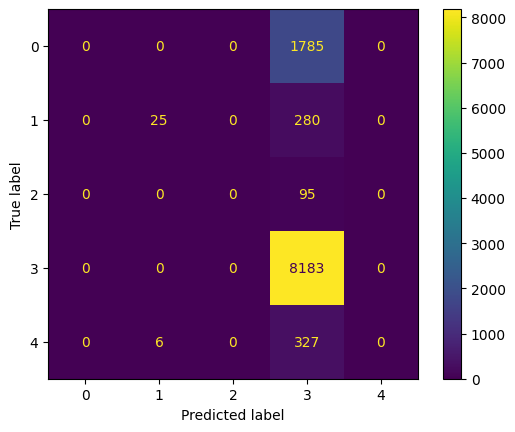

Acurácia: 76.70%
F1-score: 0.67


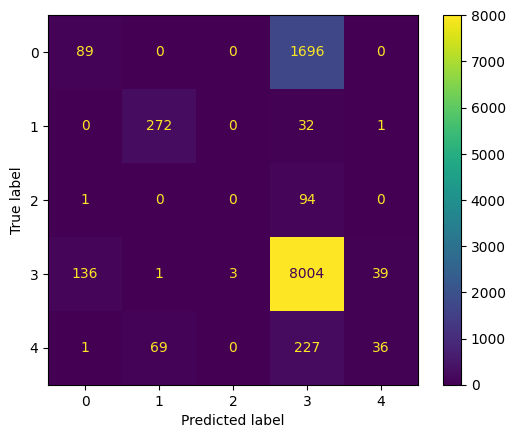

Acurácia: 78.51%
F1-score: 0.72


In [175]:
evaluate_model(randomforest, X_teste, y_teste)
evaluate_model(decisiontree, X_teste, y_teste)